# Word to Vector

![](https://lena-voita.github.io/resources/lectures/word_emb/lookup_table.gif)

## One Hot Encoding // Labelling

corpus = ["I", "like", "playing", "some", "pussies"]

In [37]:
import pandas as pd, numpy as np; c = ["I", "like", "playing", "some", "pussies"]; df = pd.DataFrame({"word": c, "one_hot": list(np.eye(len(c), dtype=int))}) ; df

,word,one_hot
0,I,"[1, 0, 0, 0, 0]"
1,like,"[0, 1, 0, 0, 0]"
2,playing,"[0, 0, 1, 0, 0]"
3,some,"[0, 0, 0, 1, 0]"
4,pussies,"[0, 0, 0, 0, 1]"


the problem is there is connection between word, or sequence, ex eat and pussies is very far, thats actually is near means corresponding each other and making some meaning.

---

## Word Embedding

instead of using one hot, we will give a label more meaning, or correlation between the word with another word.

In [38]:
df = pd.DataFrame({"word": ["I", "like", "pussies"], "Vector": [[0.2, 0.3, 0.7], [0.7, 0.1, 0.3], [0.9, 0.1, 0.4]]}); df

,word,Vector
0,I,"[0.2, 0.3, 0.7]"
1,like,"[0.7, 0.1, 0.3]"
2,pussies,"[0.9, 0.1, 0.4]"


Wait franklin, one by one

- vector, in this context is a list of number, every word is represented as list of number, that is actually from one hot encoding we using, but in there there is no direction in nd space, its too constant.

- dimention, is how we set how much meaning we want to catch. more big dimention, more feature or meaning will represented. 

- every vector of each word will has different number, but same dimention, remember, just the list of number will be different correlated to meaning it catch from corpus

- now, since we want to mapping each word to plane, because we want to know word correlated and map them nearby.


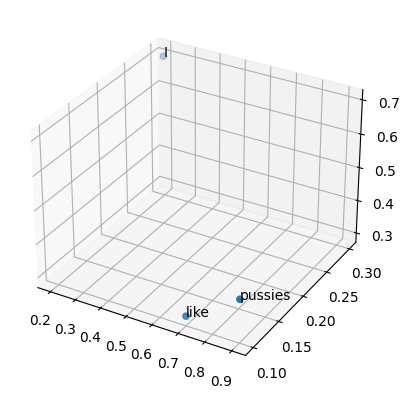

In [39]:
import pandas as pd, matplotlib.pyplot as plt; from mpl_toolkits.mplot3d import Axes3D; df = pd.DataFrame({"word": ["I", "like", "pussies"], "Vector": [[0.2, 0.3, 0.7], [0.7, 0.1, 0.3], [0.9, 0.1, 0.4]]}); fig = plt.figure(); ax = fig.add_subplot(111, projection='3d'); x,y,z = zip(*df["Vector"]); ax.scatter(x,y,z); [ax.text(x[i],y[i],z[i],w) for i,w in enumerate(df["word"])]; plt.show()

Why n-dimensional?

You,as a human, can’t be defined by just height, weight, or hairstyle. That’s too little. Each feature is a dimension in a vector.

When you define a feature as a vector, it has a value range like movement on the X-axis. But with only one axis, you only get variation in one direction.

Add a second feature, and you unlock a second dimension, now you can move up/down too, giving more possible combinations of traits. That’s 2D.

Add a third feature, 3D. Now you have movement in 3 directions: left-right, up-down, front-back. More features = more directions = more ways to describe something.

This extends to n dimensions, each new feature adds a new axis or direction, increasing the space of possible representations. That’s how we capture complex identities like you.

Back to word embedding, if we have word 'orange' and just set it to just 1 dimention, the meaning will be short, orange = fruit, but not a color. 

## Word2Vec

how we define that vector number, how we define the meaning of a word in different context?

as simple as we train, a word that based on its context, or we make the vector thats representing that word in its xi corpus context.

there is two ways to do this.

1. CBOW (Continuous Bag of Words)
- Context: ["i", "like", "___", "some", "pussies"]
- Goal   : Prediksi kata tengah: "eating"

2. Skip-Gram
- Target: "eating"
- Goal  : Prediksi ["i", "like", "some", "pussies"]

training? 

- backpropagation : 

context - (fx) - goal - loss - gradient decent - (f'x) - goal - loss -> loss = 0.0...

but, word 2 vec is a flop method, the limitation is if we has 2 corpus and want to representing x word in both corpus with different context. word2vec limit is just in analogy and synonym. 

- king -> u, man -> v, women -> w, queen -> z
- king - men + woman = queen

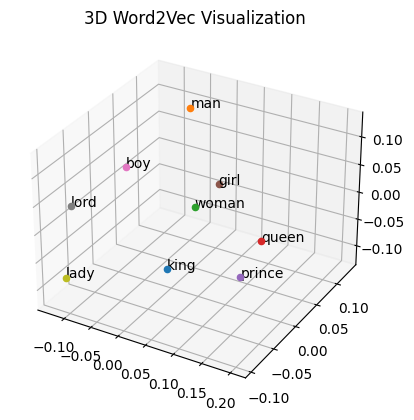

In [68]:
from gensim.models import Word2Vec; from sklearn.decomposition import PCA; import matplotlib.pyplot as plt; from mpl_toolkits.mplot3d import Axes3D; 
model = Word2Vec([['king','man','woman','queen','prince','girl','boy','lord','lady']], vector_size=10, min_count=1, epochs=1000)
w = ['king','man','woman','queen','prince','girl','boy','lord','lady']
v = [model.wv[_] for _ in w]
pca = PCA(n_components=3)
result = pca.fit_transform(v)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, word in enumerate(words):
    ax.scatter(result[i, 0], result[i, 1], result[i, 2])
    ax.text(result[i, 0], result[i, 1], result[i, 2], word)
plt.title("3D Word2Vec Visualization")
plt.show()

Make sense?

## Manually

### DATASET

In [1]:
import numpy as np

# 1. Data Awal
sentence = "saya suka makan nasi"
sentence

'saya suka makan nasi'

In [2]:
words = sentence.split()
words

['saya', 'suka', 'makan', 'nasi']

In [3]:
vocab = list(set(words))
vocab

['makan', 'nasi', 'saya', 'suka']

In [4]:
# mapping

In [13]:
word_to_index= {w: i for i, w in enumerate(vocab)}
idx_to_word = {i: w for w, i in word_to_idx.items()}

word_to_index

{'makan': 0, 'nasi': 1, 'saya': 2, 'suka': 3}

### 2. Buat training data (skip-gram window=1)

In [10]:
words = ['saya', 'suka', 'makan', 'nasi']
for i, word in enumerate(words):
    print(i, word)

0 saya
1 suka
2 makan
3 nasi


In [24]:
def generate_training_data(words, window_size=1):
    data = []
    for i, word in enumerate(words):
        target = word
        target_idx = word_to_idx[target]
        for j in range(i - window_size, i + window_size + 1):
            if j != i and 0 <= j < len(words):
                context = words[j]
                context_idx = word_to_idx[context]
                data.append({
                    'target_word': target,
                    'context_word': context,
                    'target_idx': target_idx,
                    'context_idx': context_idx
                })
                print(data[-1])  # print baris terakhir
    return data


training_data = generate_training_data(words)


{'target_word': 'saya', 'context_word': 'suka', 'target_idx': 2, 'context_idx': 3}
{'target_word': 'suka', 'context_word': 'saya', 'target_idx': 3, 'context_idx': 2}
{'target_word': 'suka', 'context_word': 'makan', 'target_idx': 3, 'context_idx': 0}
{'target_word': 'makan', 'context_word': 'suka', 'target_idx': 0, 'context_idx': 3}
{'target_word': 'makan', 'context_word': 'nasi', 'target_idx': 0, 'context_idx': 1}
{'target_word': 'nasi', 'context_word': 'makan', 'target_idx': 1, 'context_idx': 0}


[(2, 3), (3, 2), (3, 0), (0, 3), (0, 1), (1, 0)]

In [ ]:

    data = []
    for i, word in enumerate(words):
        target = word
        target_idx = word_to_idx[target]
        for j in range(i - window_size, i + window_size + 1):
            if j != i and 0 <= j < len(words):
                context = words[j]
                context_idx = word_to_idx[context]
                data.append((target_idx, context_idx))
    return data

training_data = generate_training_data(words)

# 3. One-hot encoding
def one_hot(idx, size):
    vec = np.zeros(size, i+1):
    vec[idx] = 1
    return vec

# 4. Inisialisasi bobot
V = len(vocab)
N = 2  # dimensi embedding
np.random.seed(0)
W1 = np.random.rand(V, N)
W2 = np.random.rand(N, V)

# 5. Softmax
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# 6. Training loop (1 epoch cukup untuk demo)
lr = 0.1
for target_idx, context_idx in training_data:
    X = one_hot(target_idx, V)  # input vector
    Y_true = one_hot(context_idx, V)  # expected output

    # Forward
    H = np.dot(X, W1)            # hidden layer
    U = np.dot(H, W2)            # output layer
    Y_pred = softmax(U)          # predicted context

    # Loss & backprop
    E = Y_pred - Y_true
    dW2 = np.outer(H, E)
    dW1 = np.outer(X, np.dot(W2, E))

    # Update bobot
    W1 -= lr * dW1
    W2 -= lr * dW2

# 7. Lihat hasil embedding
for word in vocab:
    idx = word_to_idx[word]
    print(f"{word}: {W1[idx]}")
